In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
path = "../out/airline_cs/random_forest_classifier.csv"
df = pd.read_csv(path)

In [93]:
small_forest = df[(df["n_trees"] >= 10) & (df["n_trees"] <= 50)].round(2)
big_forest = df[(df["n_trees"] >= 100) & (df["n_trees"] <= 500)].round(2)

## Save plots

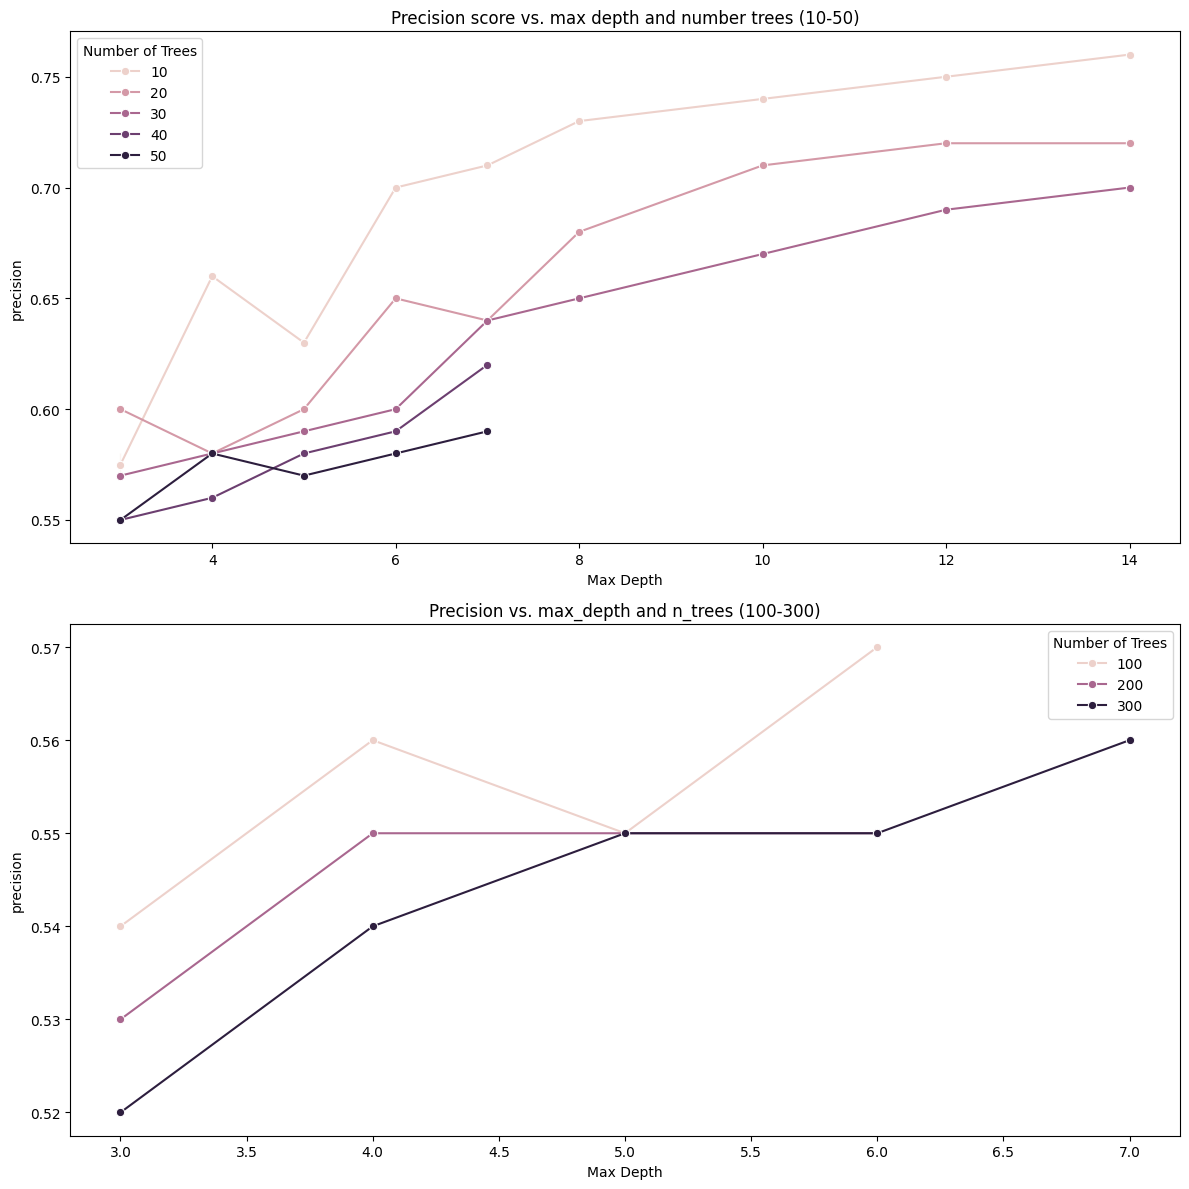

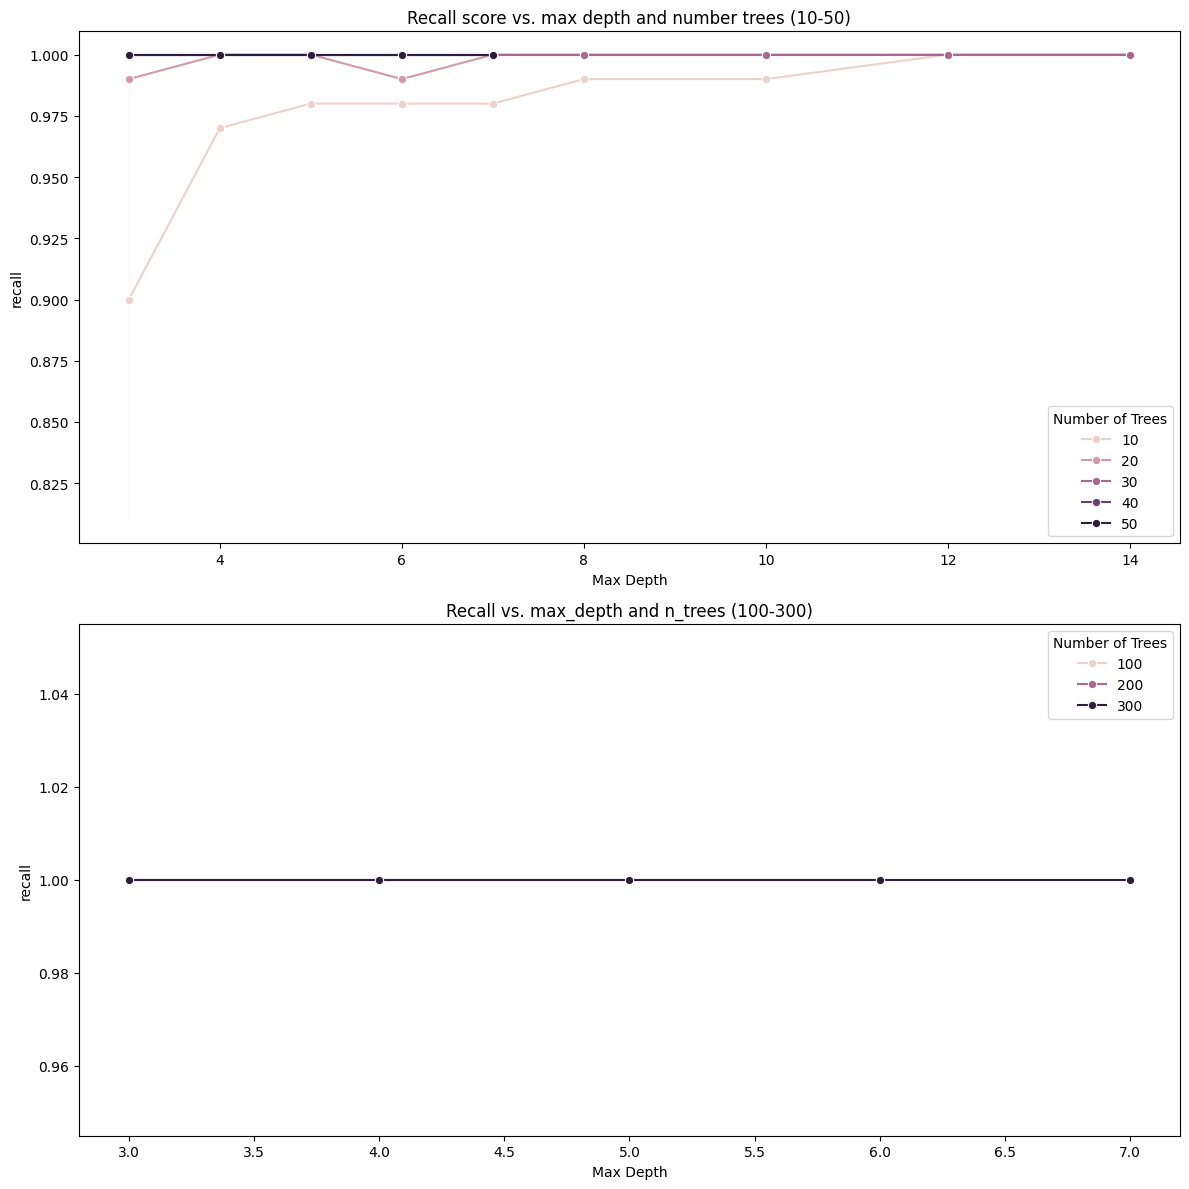

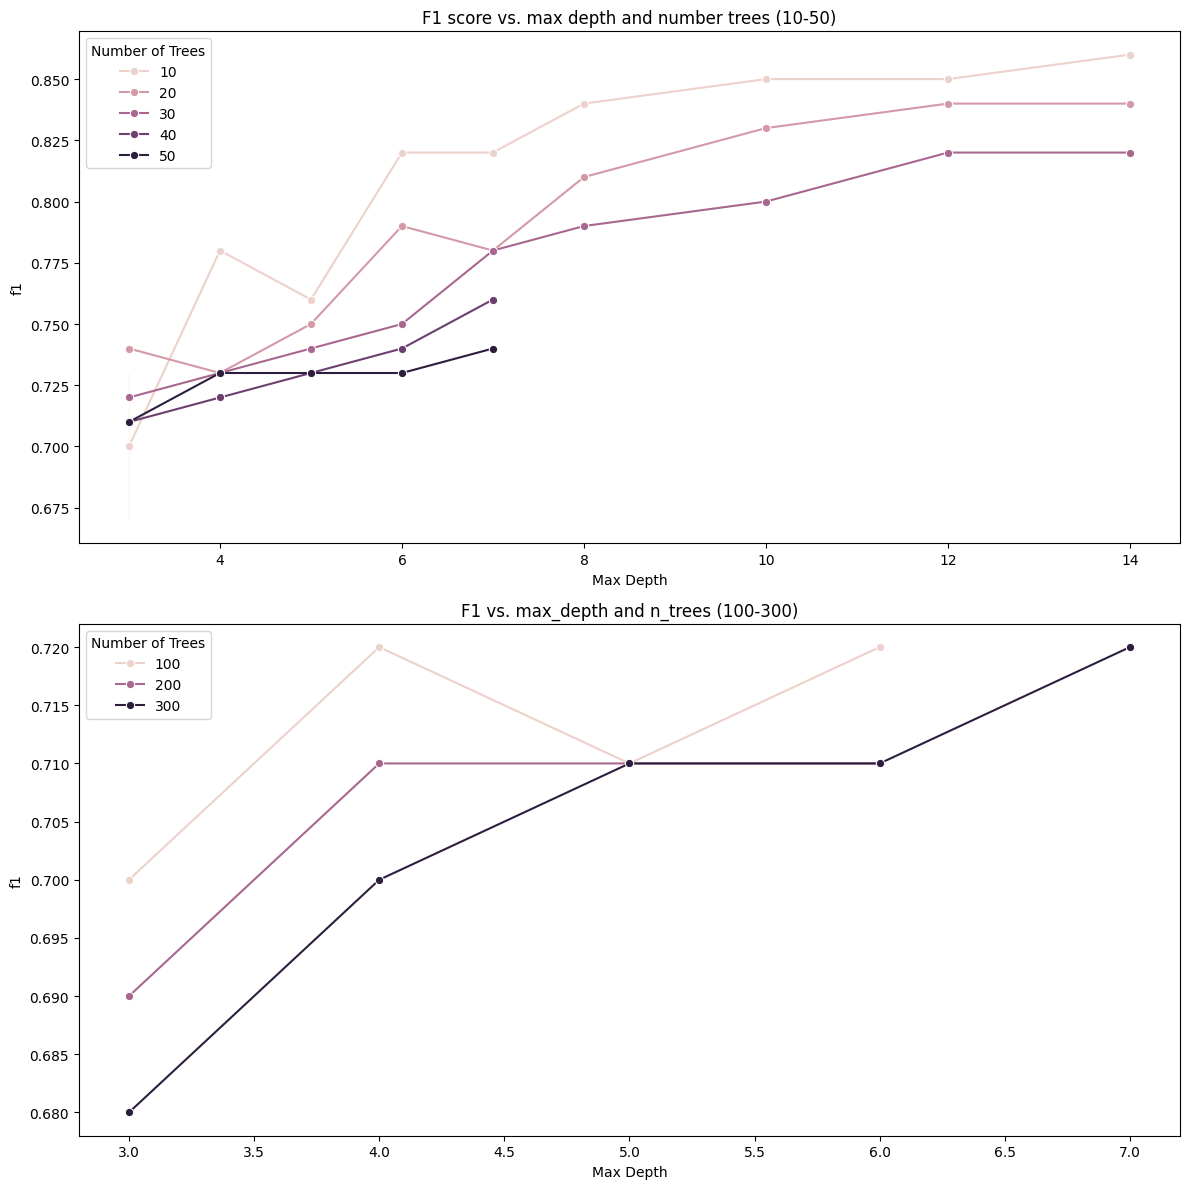

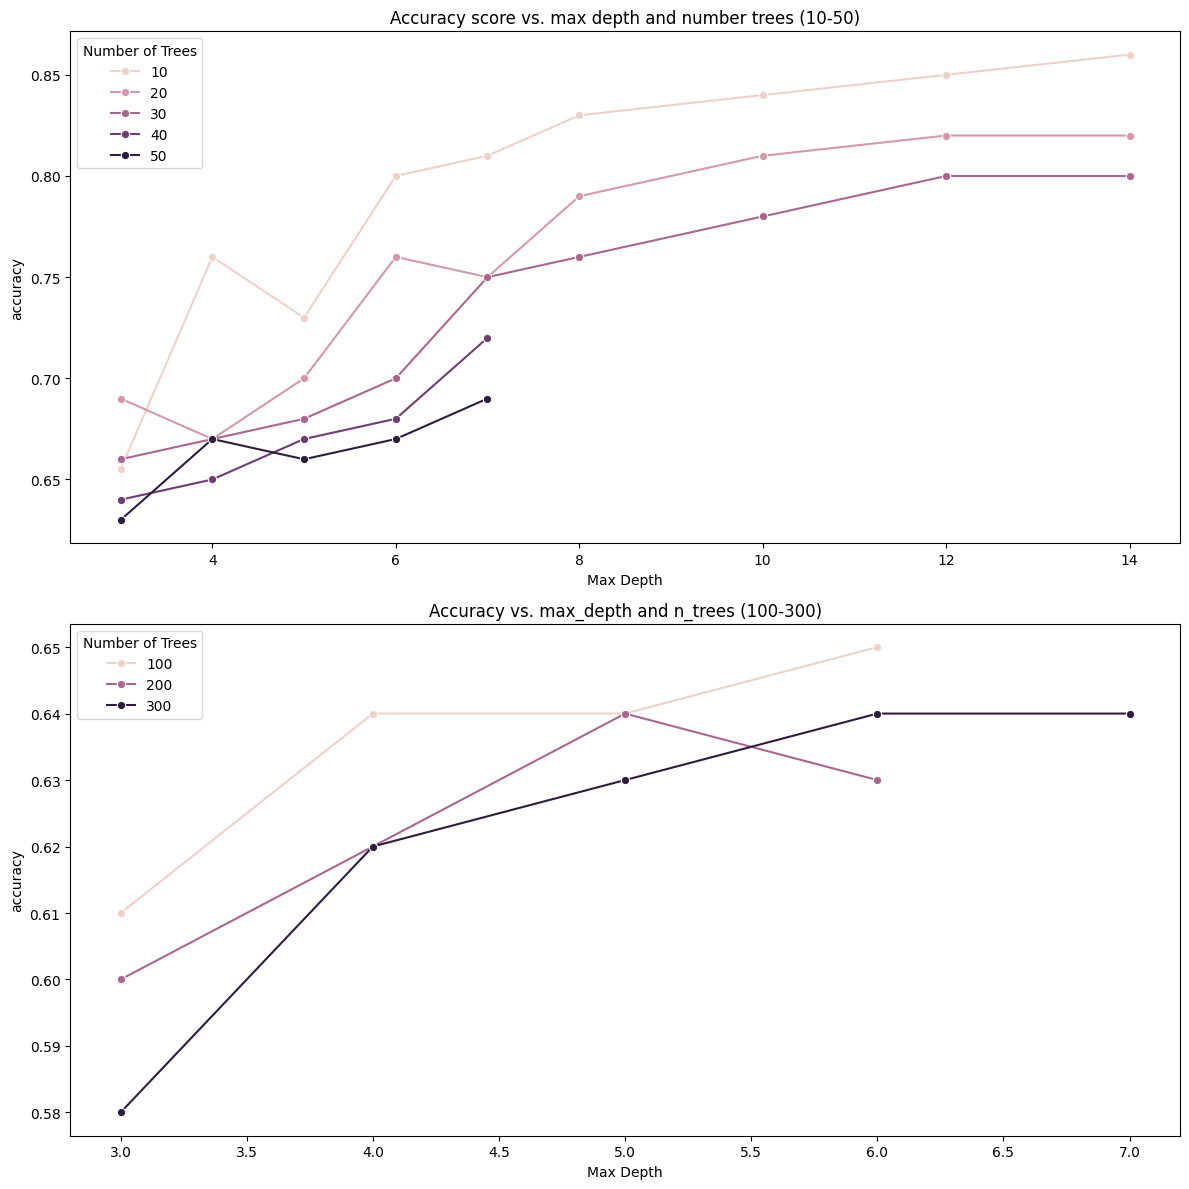

In [94]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for score, label in zip(scores, labels): 
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    sns.lineplot(ax=axes[0], data=small_forest, x="max_depth", y=score, hue="n_trees", marker="o")
    axes[0].set_title(f"{label} score vs. max depth and number of trees (10-50)")
    axes[0].set_xlabel("Max Depth")
    axes[0].set_ylabel(score)
    axes[0].legend(title="Number of Trees")

    sns.lineplot(ax=axes[1], data=big_forest, x="max_depth", y=score, hue="n_trees", marker="o")
    axes[1].set_title(f"{label} score vs.. max depth and number of trees (100-300)")
    axes[1].set_xlabel("Max Depth")
    axes[1].set_ylabel(score)
    axes[1].legend(title="Number of Trees")

    plt.tight_layout()
    plt.savefig(f"../out/airline_cs/random_forest_classifier_{score}.png")

In [87]:
small_forest[["max_depth", "n_trees", "accuracy"]].sort_values("max_depth")

small_forest.pivot_table(index='max_depth', columns='n_trees', values=['accuracy'])


accuracy                                        
n_trees          10        20        30        40        50
max_depth                                                  
3          0.654777  0.691215  0.656760  0.635105  0.630178
4          0.756756  0.673025  0.666192  0.648560  0.666789
5          0.726055  0.701320  0.683708  0.669965  0.660745
6          0.801336  0.755967  0.695815  0.682207  0.669907
7          0.807226  0.749654  0.747267  0.719857  0.686615
8          0.825897  0.786168       NaN       NaN       NaN
10         0.841046  0.813366       NaN       NaN       NaN
12         0.846589  0.824588       NaN       NaN       NaN
14         0.858600  0.824299       NaN       NaN       NaN